In [96]:
import numpy as np
import matplotlib.pyplot as plt
from data.make_dataset import load_mitbih, load_ptbdb
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from keras.models import Model, load_model
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import random

In [94]:
_, test, _, y_test = load_mitbih()
train,ptbdb_test, y_train, ptbdb_y_test= load_ptbdb()

In [9]:
model = load_model('./cnn-lstm-mitbih/cnn-lstm-mitbih.h5')
model.load_weights('./cnn-lstm-mitbih/cnn-lstm-mitbih-weights.h5')

In [11]:
model.layers

In [13]:
total_layers = len(model.layers)
total_layers

10

In [75]:
feature_layer = total_layers - 3

In [81]:
feature_layer_model = Model(
    inputs=model.inputs,
    outputs=Dense(2,activation='softmax')(Dense(128,activation='relu')(model.get_layer(index=feature_layer).output)),
    )

In [82]:
for layer in model.layers[:-3]:
    print(layer)
    layer.trainable = False

In [92]:
feature_layer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [93]:
feature_layer_model.fit(train,y_train,validation_split=0.2,epochs=3)

Train on 9312 samples, validate on 2329 samples
Epoch 1/3
9312/9312 [==============================] - 22s 2ms/step - loss: 0.0627 - sparse_categorical_accuracy: 0.9762 - val_loss: 0.0724 - val_sparse_categorical_accuracy: 0.9772
Epoch 2/3
9312/9312 [==============================] - 22s 2ms/step - loss: 0.0305 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.0434 - val_sparse_categorical_accuracy: 0.9850
Epoch 3/3
9312/9312 [==============================] - 22s 2ms/step - loss: 0.0136 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.0282 - val_sparse_categorical_accuracy: 0.9923


In [95]:
ptbdb_preds = feature_layer_model.predict(ptbdb_test)

In [98]:
print(classification_report(ptbdb_y_test, ptbdb_preds.argmax(1)))
print(confusion_matrix(ptbdb_y_test,ptbdb_preds.argmax(1)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       809
           1       0.99      1.00      0.99      2102

    accuracy                           0.99      2911
   macro avg       0.99      0.99      0.99      2911
weighted avg       0.99      0.99      0.99      2911

[[ 790   19]
 [  10 2092]]


In [78]:
fl_output.shape

(10, 5632)

In [67]:
indices = np.arange(y_test.shape[0])
np.random.shuffle(indices)
output_shuffled, y_shuffled = fl_output[indices], y_test[indices]
np.unique(y_shuffled[:5000],return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int8), array([4112,  134,  328,   36,  390]))

In [71]:
X = PCA(n_components=50).fit_transform(output_shuffled[:5000,:])
X_embedded = TSNE(n_components=2).fit_transform(X)

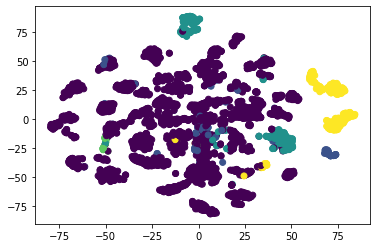

In [73]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = y_shuffled[:5000])